In [22]:
import pandas as pd

df = pd.read_csv("../old uncertain csvs/2009-2010.csv")

df

KeyboardInterrupt: 

In [17]:
df = df.drop(df.columns[0],axis =1)

In [18]:
from global_land_mask import globe

dff = df.copy()

dff = dff.drop(dff[dff.Longitude > 180].index)
dff = dff.drop(dff[globe.is_land(dff.Latitude, dff.Longitude)].index)

In [19]:
dff

,Date,Time,Latitude,Longitude,Uncertainty,nstn,Power (J),pUncertainty,nstn_power
0,2009/12/1,00:00:01.848427,44.4620,-60.4297,18.1,12,2042.55,391.54,11
1,2009/12/1,00:00:02.753030,-4.3931,110.6535,5.8,9,508.06,102.17,9
2,2009/12/1,00:00:02.828191,-4.4173,110.6726,6.2,8,859.41,136.79,8
3,2009/12/1,00:00:02.520994,-0.7712,147.4350,12.5,7,3386.29,645.56,7
5,2009/12/1,00:00:02.965222,-4.3832,110.6624,14.5,10,551.19,122.95,9
...,...,...,...,...,...,...,...,...,...
6836977,2010/2/28,23:59:43.808739,-3.5137,108.4191,8.8,8,926.00,225.49,6
6836979,2010/2/28,23:59:44.921250,33.2111,-29.0588,12.2,8,491.94,97.69,6
6836980,2010/2/28,23:59:45.398350,-18.3705,43.9104,15.6,7,4153.30,622.81,3
6836981,2010/2/28,23:59:48.631622,2.9437,94.6678,10.4,7,589.79,176.15,5


In [20]:
import pandas as pd

middleEast = dff.copy()
middleEast = middleEast[(middleEast['Latitude'] < 50) & (middleEast['Latitude'] > 29)] 
middleEast = middleEast[(middleEast['Longitude'] > -5) & (middleEast['Longitude'] < 36)]
middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 40.625) & (middleEast['Longitude'] > 26.625))].index)
middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 43) & (middleEast['Longitude'] < 2))].index)
middleEast['latlong'] = middleEast['Latitude'].astype("string")+','+middleEast['Longitude'].astype("string")
middleEast

,Date,Time,Latitude,Longitude,Uncertainty,nstn,Power (J),pUncertainty,nstn_power,latlong
7,2009/12/1,00:00:05.665519,37.6420,4.9377,12.3,11,60484.92,9786.55,3,"37.642,4.9377"
80,2009/12/1,00:01:11.526725,38.6991,8.3091,16.0,9,3046.67,896.31,3,"38.6991,8.3091"
173,2009/12/1,00:02:38.842432,36.9608,4.2523,29.6,7,7787.19,165.23,3,"36.9608,4.2523"
193,2009/12/1,00:02:54.726844,39.0087,5.9722,14.0,7,851.00,150.34,3,"39.0087,5.9722"
195,2009/12/1,00:02:56.941956,37.3525,7.2369,26.7,7,5440.39,965.21,2,"37.3525,7.2369"
...,...,...,...,...,...,...,...,...,...,...
6792882,2010/2/28,11:38:39.887103,32.6545,33.8714,17.1,12,39526.91,8684.61,5,"32.6545,33.8714"
6793055,2010/2/28,11:43:22.537119,33.6867,35.3985,22.9,10,67162.17,20031.69,5,"33.6867,35.3985"
6794465,2010/2/28,12:25:13.430767,34.2848,35.5609,18.8,9,111730.92,30971.10,5,"34.2848,35.5609"
6795679,2010/2/28,12:59:37.804226,33.8951,35.3662,20.2,9,142973.62,10744.66,6,"33.8951,35.3662"


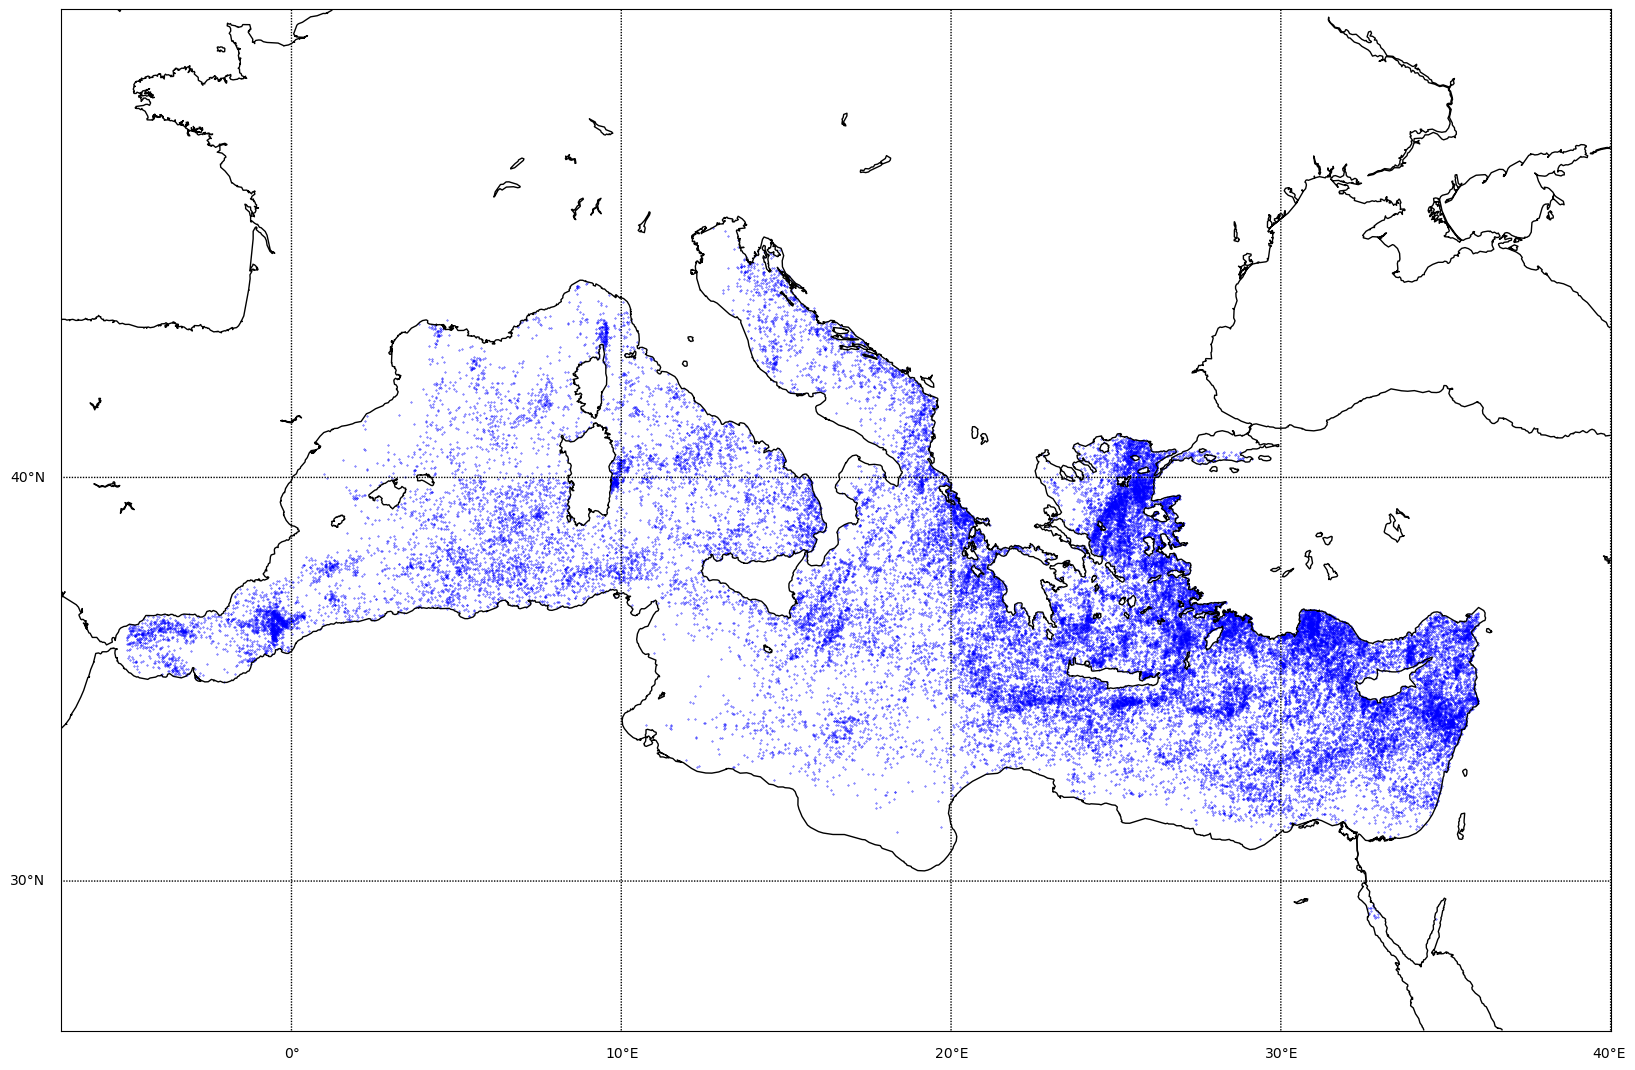

In [21]:
#points medi - holtzworth superbolts
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 40))

# Create a basemap with the Robinson projection
m = Basemap(projection='merc',llcrnrlat=26,urcrnrlat=50,\
            llcrnrlon=-7,urcrnrlon=40,lat_ts=20,resolution='i')
# Convert the latitude and longitude columns to lists
lons = middleEast['Longitude'].tolist()
lats = middleEast['Latitude'].tolist()

# Convert the latitude and longitude lists to numpy arrays
x, y = m(lons, lats)

# Calculate the KDE
m.scatter(x, y, c='b', marker='o', alpha=1, s=0.1)

# Add the basemap and the KDE to the plot
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(-180, 180, 10), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0])

# Show the plot
plt.savefig("../Maps/mediterranean post HW.png")
